## Introduction: Analysis of the House Sales Market in King County

## Imports

This is an inferential analysis, therefore it will heavily rely on statsmodels for statistical testing, modeling and analysis.

Below is a list of all the necessary imports:

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 


Load data: 

In [209]:
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [210]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## King County Dataset Column Descriptions

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:**  Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Whether the house is on a waterfront.
* **view:** Quality of view from house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house. Related to the construction and design of the house.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.


## EDA and Data Cleaning

Start with EDA to understand the DataFrame, identify inconsistencies and finally run a summary statistics which will determine how to rectify some of the inconsitencies.

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Rectify data types in the following columns:
* **id:** **integer to object*
* **bathrooms:** **float to integer*
* **floors:** **float to integer*
* **grade:** **object to integer*
* **sqft_basement:** **object to float*
* **yr_built:** **integer to object*
* **yr_renovated:** **float to object*
* **zipcode:** **integer to object*
* **lat:** **integer to object*
* **long:** **integer to object*

start with converting integers to objects ...

In [212]:
df = df.astype({
    'id': object,
    'yr_built': object,
    'zipcode': object,
    'lat': object,
    'long': object,
    'yr_renovated': object
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  object 
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  object 
 15  yr_renovated   17755 non-null  object 
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  object 
 18  long  

proceed to converting floats to the nearest integer ...

In [213]:
floats_to_integers = ['bathrooms', 'floors']
df[floats_to_integers] = df[floats_to_integers].round().astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  object 
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int32  
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int32  
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  object 
 15  yr_renovated   17755 non-null  object 
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  object 
 18  long  

In [214]:
#convert sqft_basement object to float
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors= 'coerce')
df['sqft_basement'].fillna(0.0, inplace= True)

# Extract integers from grade 
df['grade'] = df['grade'].str.extract('(\d+)').astype(int)

#convert date to object
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  object        
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  int32         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  object        
 15  yr_renovated   1775

In [215]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,NaN,NONE,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,NO,NONE,...,7,2170,400.0,1951,1991.0,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,NO,NONE,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,NO,NONE,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,NO,NONE,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


All the data types are correctly rectified. 

Proceed to eliminating duplicates if there is any ...

In [216]:
df.duplicated().sum()

0

There are no duplicates, so get the df shape summary ...

In [217]:
df.shape

(21597, 21)

* **No. of Rows:** 21597 rows present in the DataFrame.
* **No. of Columns:** 21 columns (variables) present in the DataFrame.

Describe the dataframe to get a clear idea of the data distribution.

In [218]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,7.657915,1788.596842,285.716581,1986.620318,12758.283512
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,8.000000,2210.000000,550.000000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000
std,NaN,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,1.173200,827.759761,439.819830,685.230472,27274.441950


Check for null values in the entire df ...

In [219]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Look at the entries of the objects with null, to decide on the best solution for the NaaNs in these columns ...

In [220]:
waterfront_count = df['waterfront'].value_counts()
waterfront_count

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [221]:
view_count = df['view'].value_counts()
view_count

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [222]:
yr_renovated_count = df['yr_renovated'].value_counts()
yr_renovated_count 

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

* **waterfront:** Replace NaN with 'UNKNOWN'.
* **view:** Replace NaN with 'UNRATED".
* **yr_renovated:** Replace missing data with the modal value.

In [223]:
df['waterfront'] = df['waterfront'].fillna('UNKNOWN')
df['view'] = df['view'].fillna('UNRATED')

df['yr_renovated'] = df['yr_renovated'].astype(str)
yr_renovated_mode = df['yr_renovated'].mode().iloc[0]
df['yr_renovated'].fillna(yr_renovated_mode, inplace= True)


In [224]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Cardinality of the object columns

Use cardinality to make an informed data driven approach on the object columns to keep.

In [225]:
cardinality = df.select_dtypes(include= 'object').nunique()
cardinality 

id              21420
waterfront          3
view                6
condition           5
yr_built          116
yr_renovated       71
zipcode            70
lat              5033
long              751
dtype: int64

Ids should be unique, however based on the cardinality, there exists duplicate rows with similar ids ...

In [226]:
id_duplicates = df.groupby('id').filter(lambda x: len(x) > 1)
id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,2,1580,5000,1,NO,NONE,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,2,1580,5000,1,NO,NONE,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3,4290,12103,1,NO,GOOD,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3,4290,12103,1,NO,GOOD,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1,1240,12092,1,UNKNOWN,NONE,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2,2680,5539,2,UNKNOWN,NONE,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1,1200,2171,2,NO,NONE,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1,1200,2171,2,NO,NONE,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3,2780,6000,2,NO,NONE,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


Drop all the id duplicates ...

In [227]:
df = df.drop_duplicates(subset='id', keep='last')
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  object        
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  int32         
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  int32         
 8   waterfront     21420 non-null  object        
 9   view           21420 non-null  object        
 10  condition      21420 non-null  object        
 11  grade          21420 non-null  int32         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  float64       
 14  yr_built       21420 non-null  object        
 15  yr_renovated   21420 non

To eliminate the problem of redundancy in the dataframe, here some columns that will be dropped:
* date
* zipcode
* lat
* long

In [228]:
df = df.drop(columns= ['date', 'zipcode', 'lat', 'long'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  int32  
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  int32  
 7   waterfront     21420 non-null  object 
 8   view           21420 non-null  object 
 9   condition      21420 non-null  object 
 10  grade          21420 non-null  int32  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  float64
 13  yr_built       21420 non-null  object 
 14  yr_renovated   21420 non-null  object 
 15  sqft_living15  21420 non-null  int64  
 16  sqft_lot15     21420 non-null  int64  
dtypes: float64(2), int32(3), int64(6), object(6)
memory usa


## Pair plot

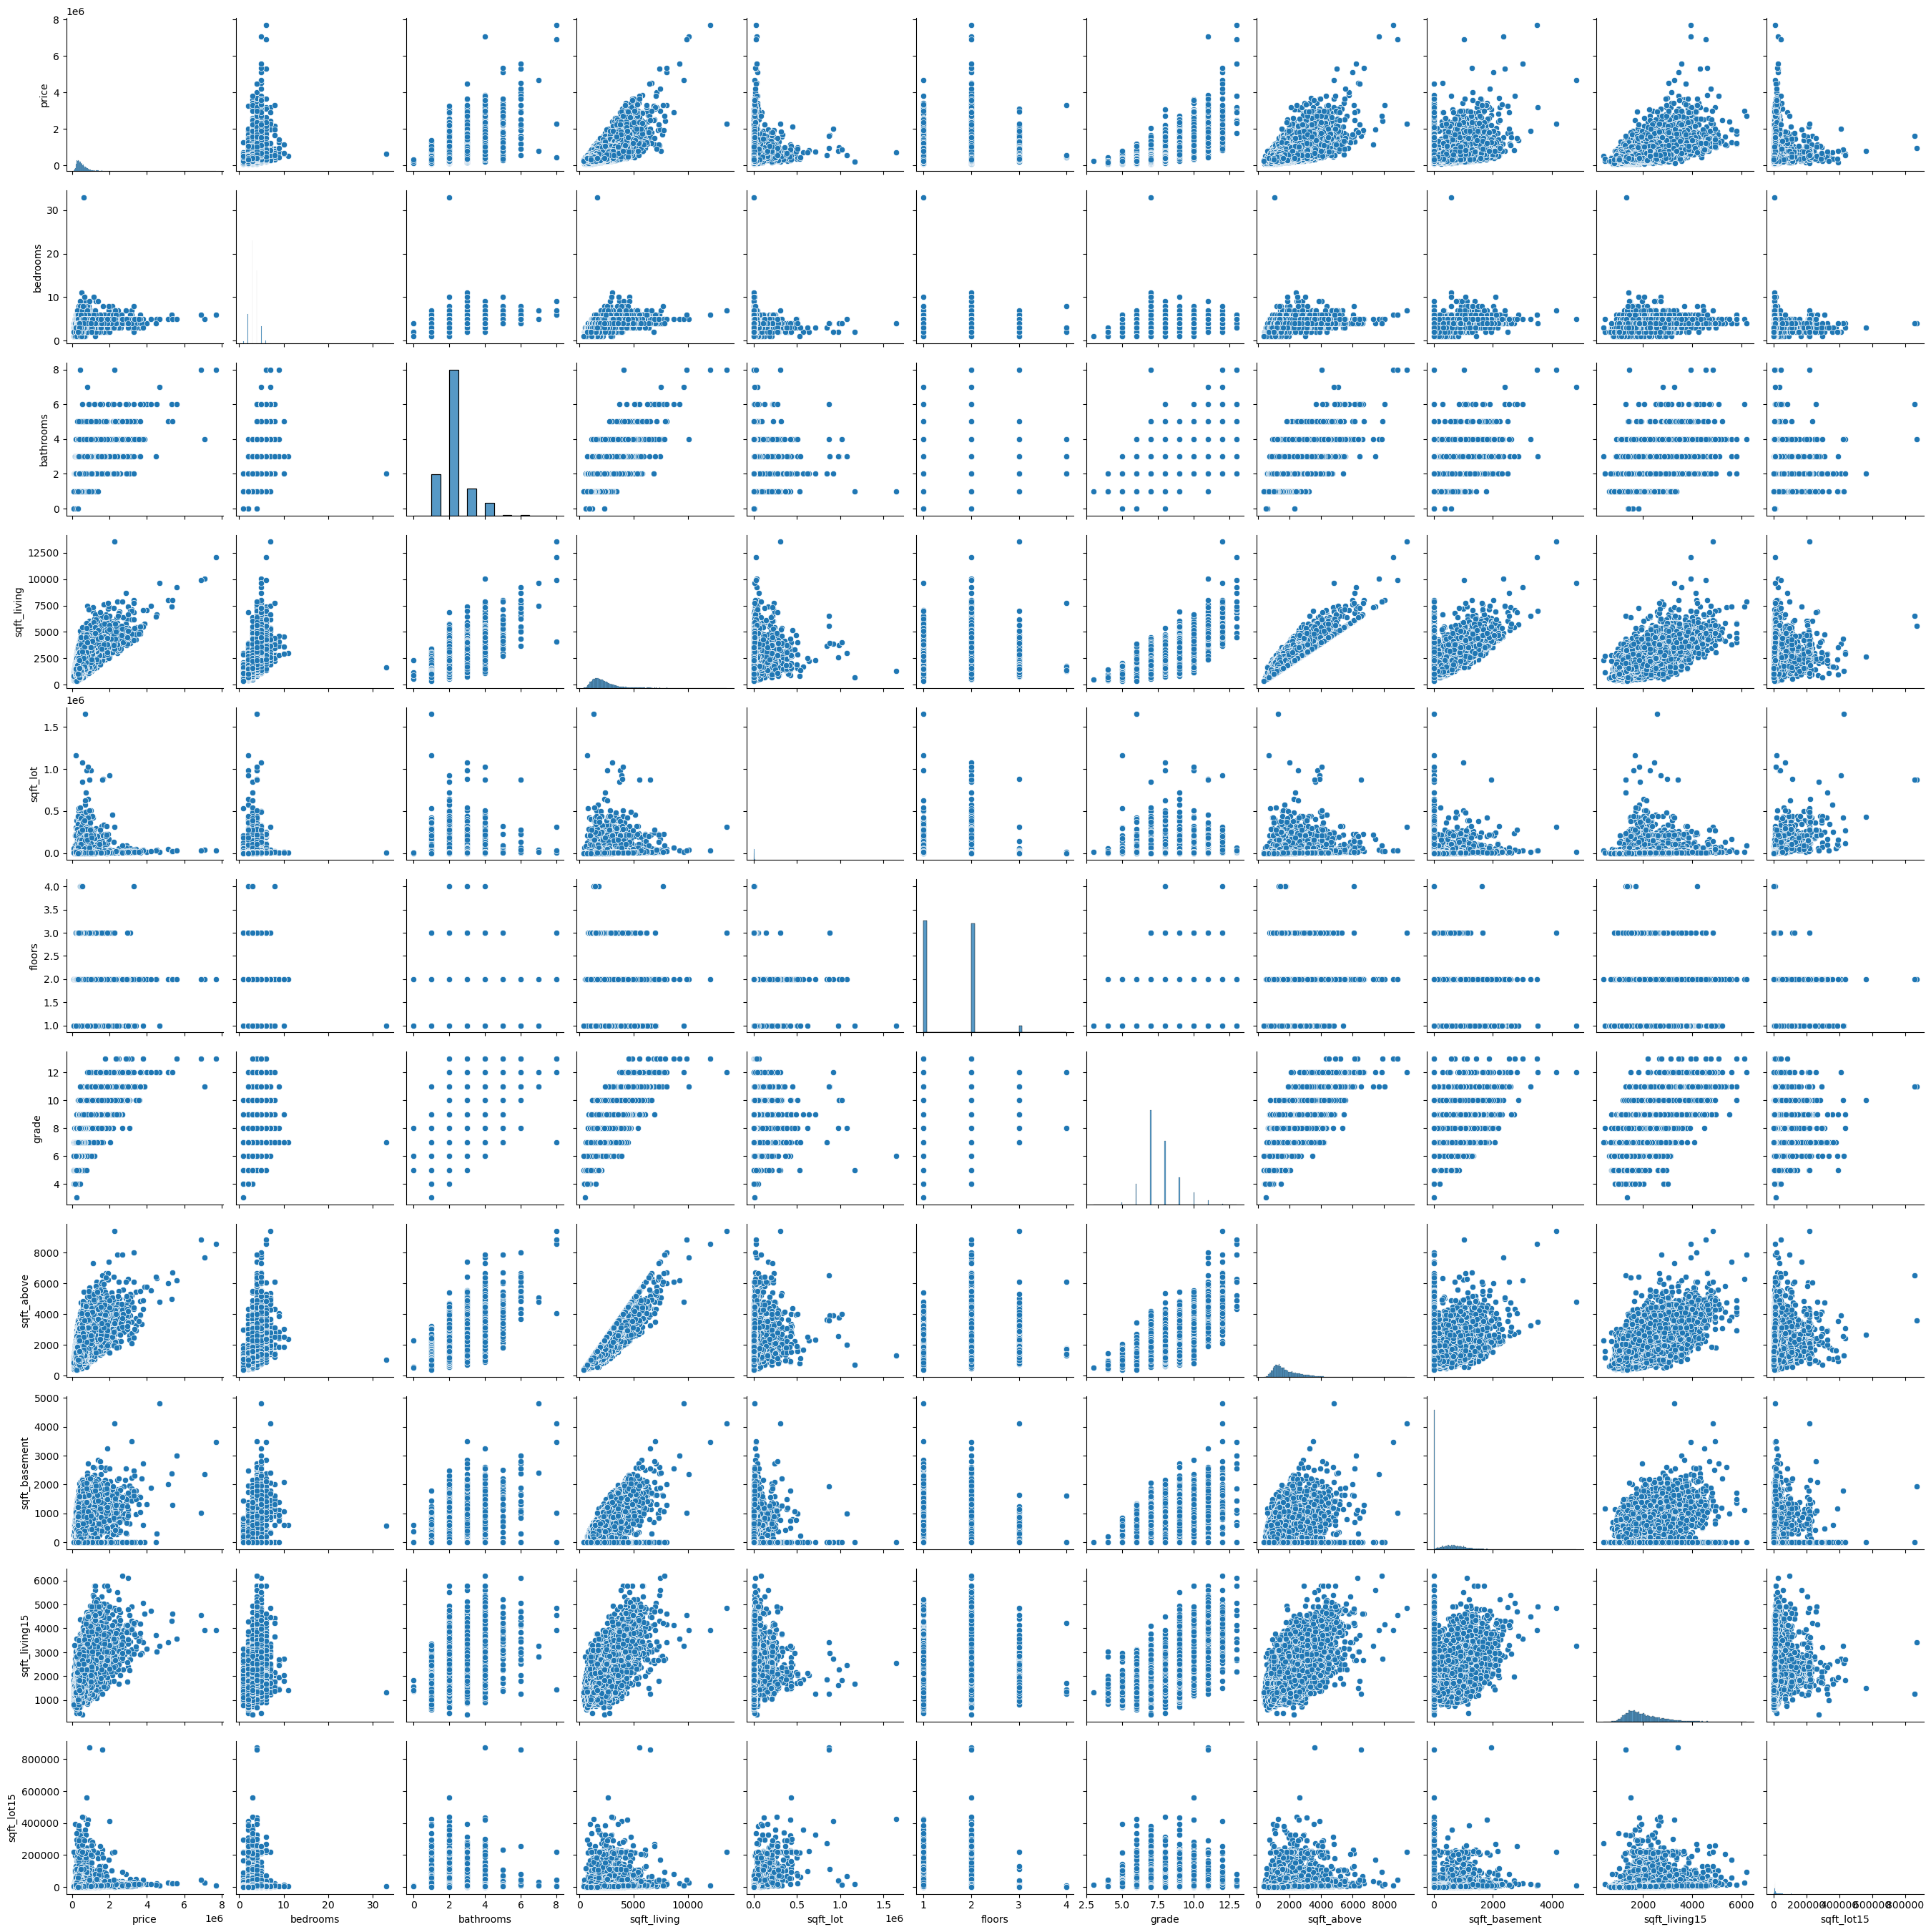

In [229]:
numeric_df = df.select_dtypes(include='number')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    sns.pairplot(numeric_df)


## Correlation Matrix

In [230]:
numeric_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.309640,0.519198,0.701295,0.088789,0.243406,0.666835,0.604424,0.321264,0.583792,0.082045
bedrooms,0.309640,1.000000,0.488575,0.579069,0.032490,0.179769,0.357988,0.480242,0.297093,0.394949,0.030570
bathrooms,0.519198,0.488575,1.000000,0.702395,0.089964,0.327249,0.591285,0.599946,0.328880,0.497687,0.087315
sqft_living,0.701295,0.579069,0.702395,1.000000,0.172586,0.321002,0.762477,0.876533,0.427998,0.756186,0.183837
sqft_lot,0.088789,0.032490,0.089964,0.172586,1.000000,-0.002124,0.113656,0.183210,0.014839,0.143805,0.717743
floors,0.243406,0.179769,0.327249,0.321002,-0.002124,1.000000,0.407815,0.487413,-0.242493,0.242183,-0.010793
grade,0.666835,0.357988,0.591285,0.762477,0.113656,0.407815,1.000000,0.756221,0.164458,0.713178,0.120056
sqft_above,0.604424,0.480242,0.599946,0.876533,0.183210,0.487413,0.756221,1.000000,-0.051707,0.731887,0.194445
sqft_basement,0.321264,0.297093,0.328880,0.427998,0.014839,-0.242493,0.164458,-0.051707,1.000000,0.198127,0.015870
sqft_living15,0.583792,0.394949,0.497687,0.756186,0.143805,0.242183,0.713178,0.731887,0.198127,1.000000,0.182765


## Feature Selection

In [231]:
df = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  object 
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  int32  
 4   sqft_living   21420 non-null  int64  
 5   floors        21420 non-null  int32  
 6   waterfront    21420 non-null  object 
 7   view          21420 non-null  object 
 8   condition     21420 non-null  object 
 9   grade         21420 non-null  int32  
 10  yr_built      21420 non-null  object 
 11  yr_renovated  21420 non-null  object 
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 1.9+ MB


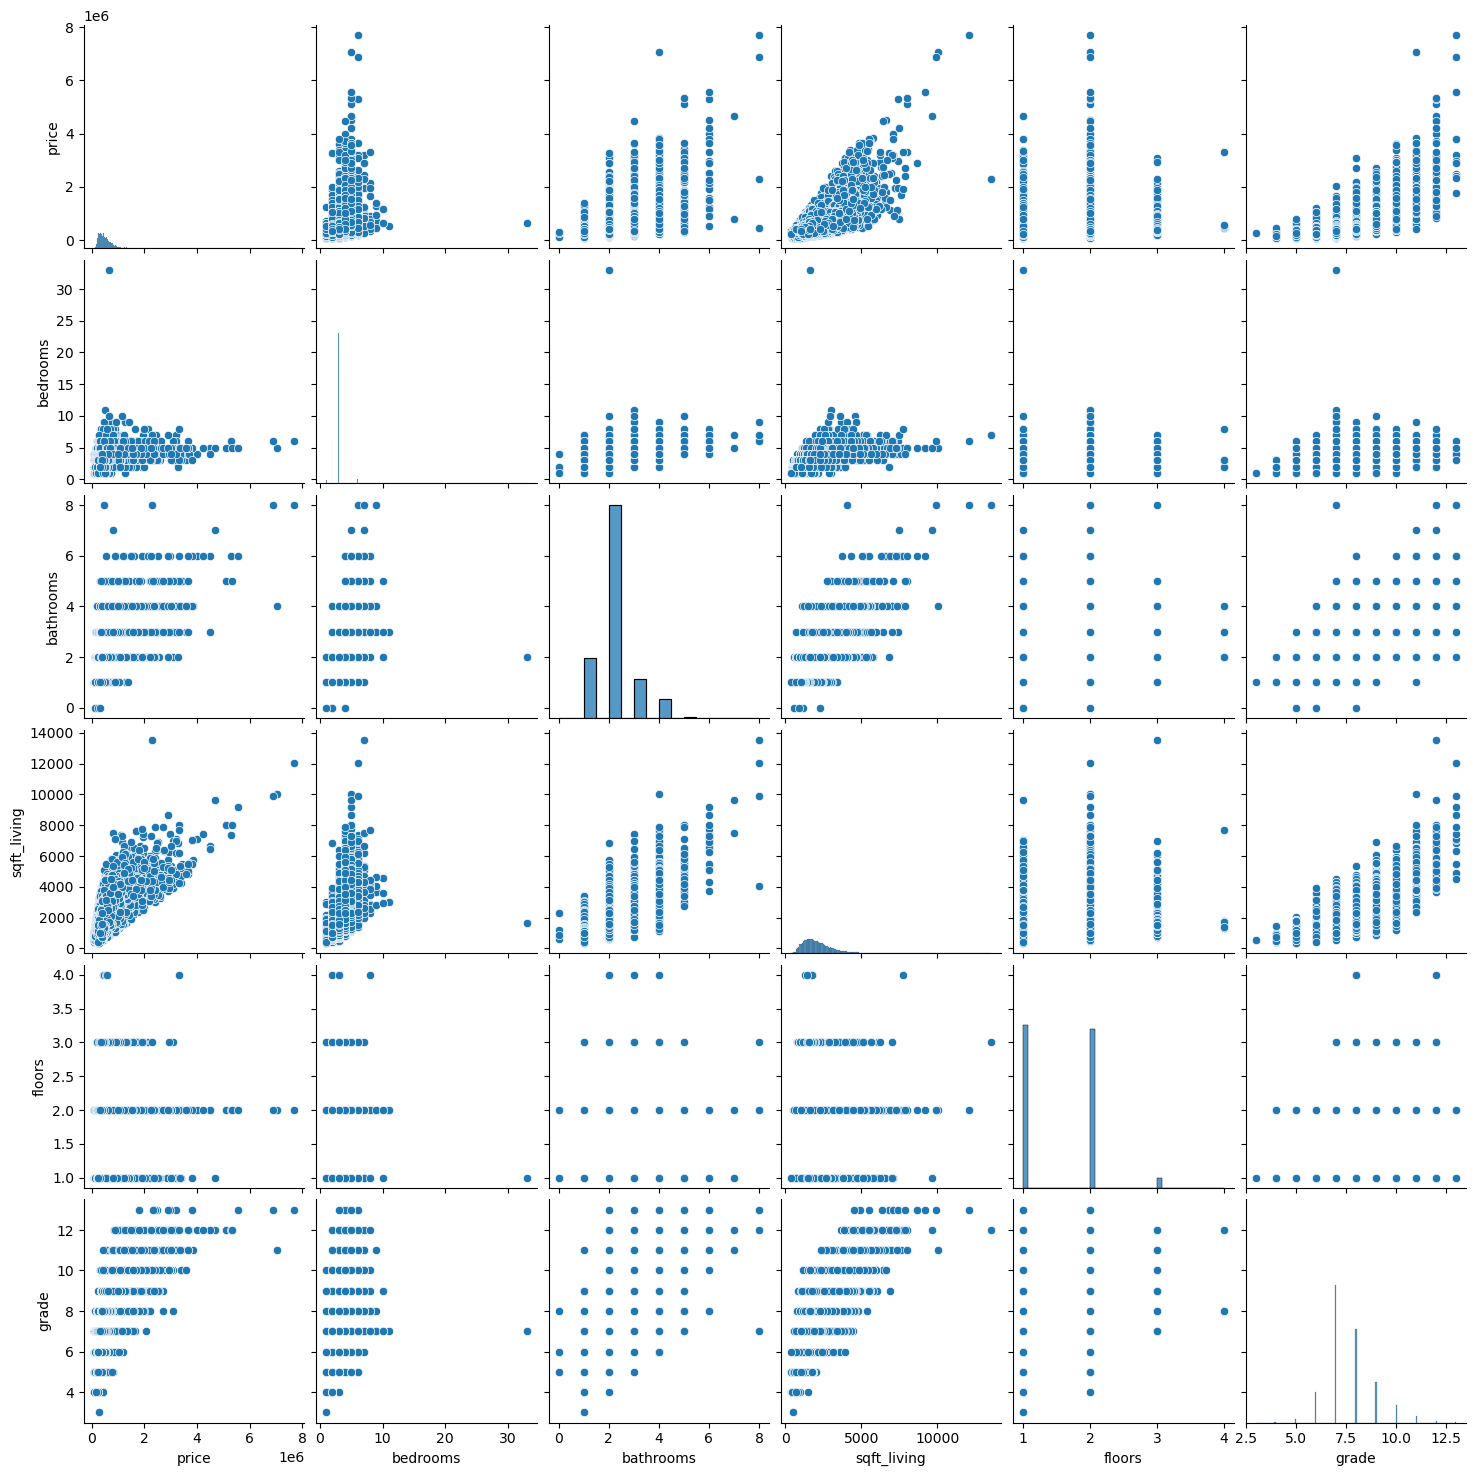

In [232]:
numeric_df = df.select_dtypes(include= 'number')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    sns.pairplot(numeric_df)

## Outliers

* Numeric data

Looking at the above pairplot, most of the numeric data has skewed distribution. Therefore, check for outliers and decide on how to handle them based on the distribution of the data.

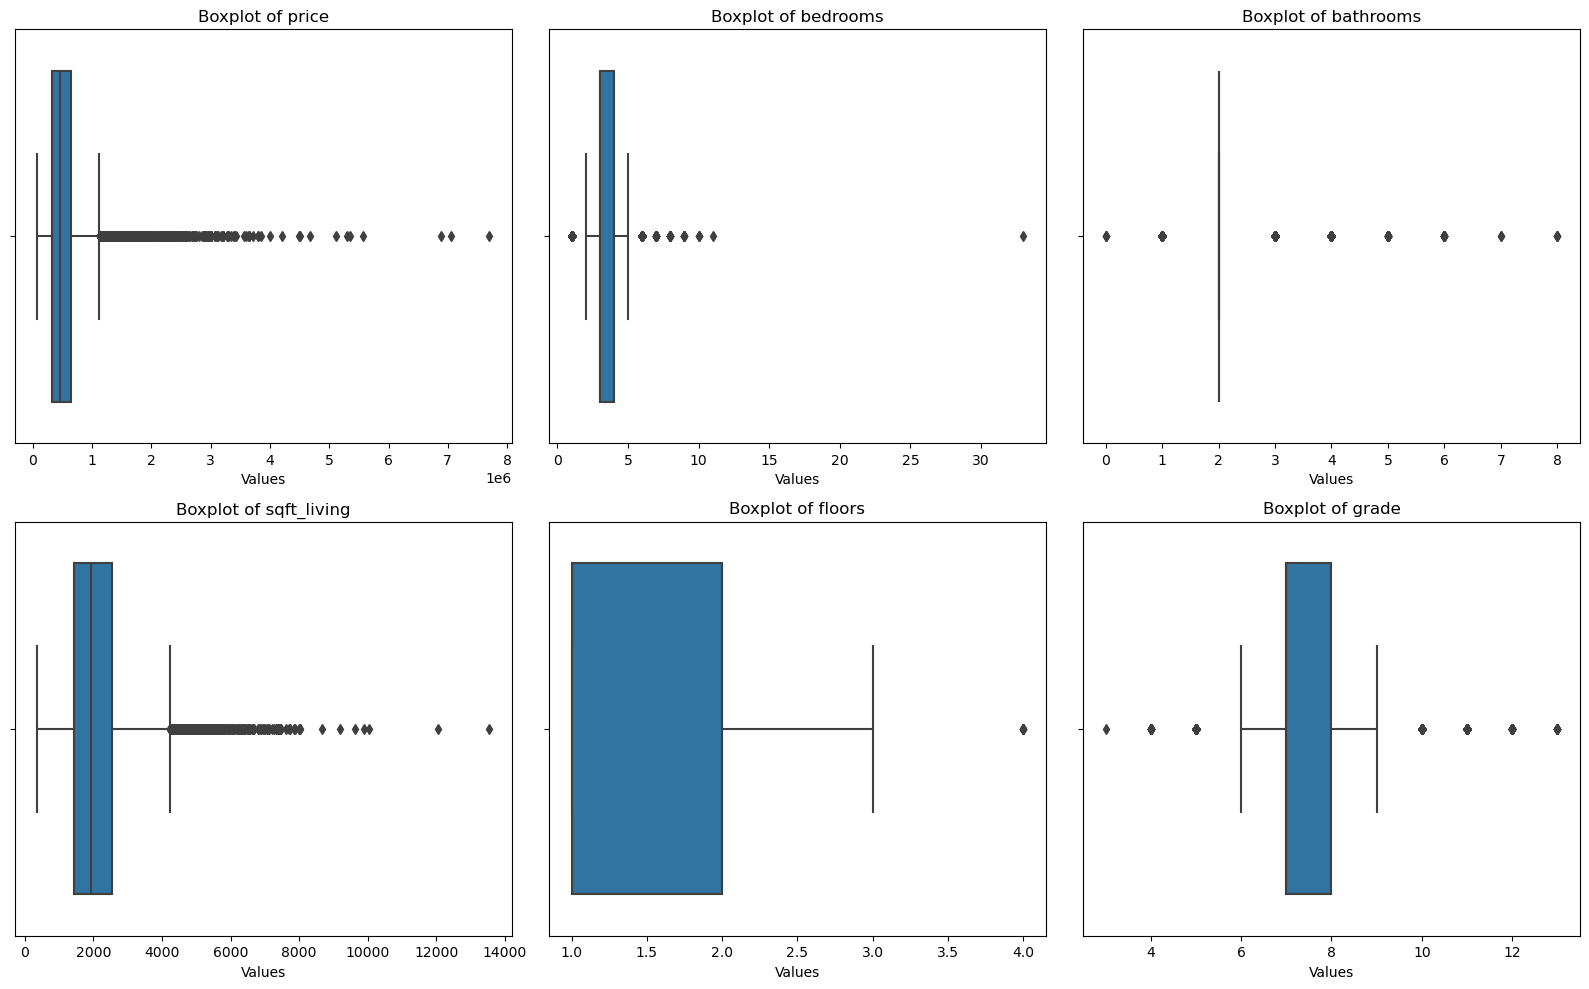

In [233]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [234]:
numeric_df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,grade
price,1.000000,0.309640,0.519198,0.701295,0.243406,0.666835
bedrooms,0.309640,1.000000,0.488575,0.579069,0.179769,0.357988
bathrooms,0.519198,0.488575,1.000000,0.702395,0.327249,0.591285
sqft_living,0.701295,0.579069,0.702395,1.000000,0.321002,0.762477
floors,0.243406,0.179769,0.327249,0.321002,1.000000,0.407815
grade,0.666835,0.357988,0.591285,0.762477,0.407815,1.000000


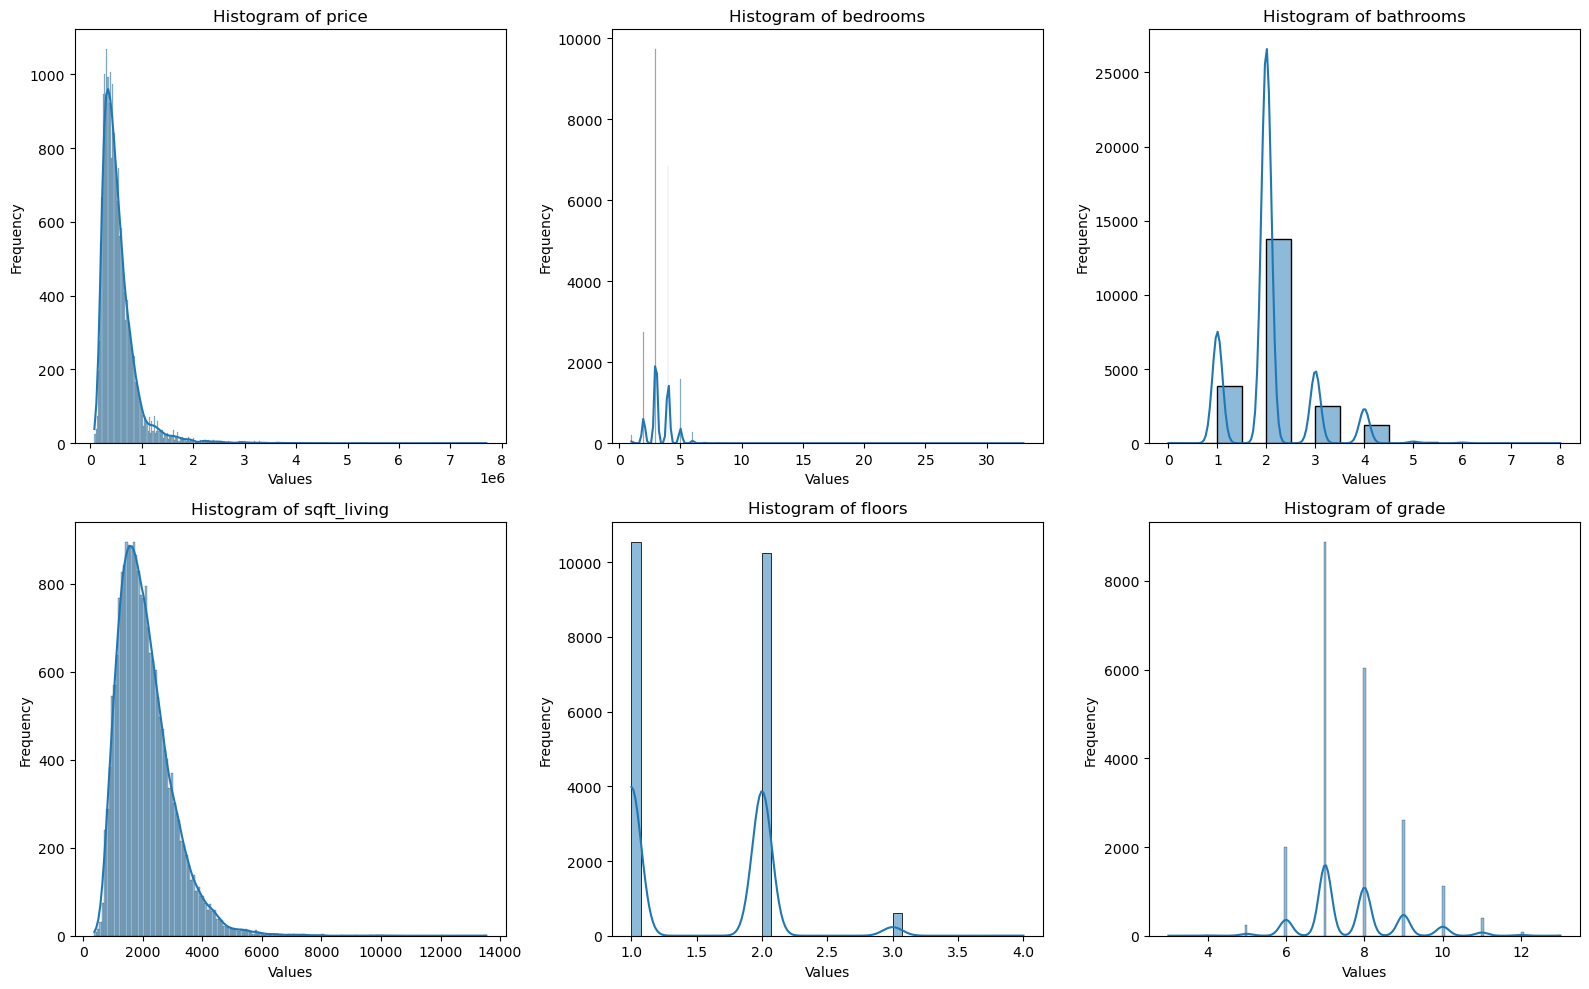

In [235]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(16, 10))
    
    for i, col in enumerate(numeric_df.columns):
        plt.subplot(2, 3, i + 1)
        sns.histplot(numeric_df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  object 
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  int32  
 4   sqft_living   21420 non-null  int64  
 5   floors        21420 non-null  int32  
 6   waterfront    21420 non-null  object 
 7   view          21420 non-null  object 
 8   condition     21420 non-null  object 
 9   grade         21420 non-null  int32  
 10  yr_built      21420 non-null  object 
 11  yr_renovated  21420 non-null  object 
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 1.9+ MB


## Drop Outliers

In [237]:
#calculate IQR for selected columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)


outlier_indices = numeric_df.index[outliers]

# Remove all the outliers
df = df.drop(outlier_indices)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12801 entries, 1 to 21595
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12801 non-null  object 
 1   price         12801 non-null  float64
 2   bedrooms      12801 non-null  int64  
 3   bathrooms     12801 non-null  int32  
 4   sqft_living   12801 non-null  int64  
 5   floors        12801 non-null  int32  
 6   waterfront    12801 non-null  object 
 7   view          12801 non-null  object 
 8   condition     12801 non-null  object 
 9   grade         12801 non-null  int32  
 10  yr_built      12801 non-null  object 
 11  yr_renovated  12801 non-null  object 
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 1.1+ MB


In [239]:
numeric_df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,grade
price,1.000000,0.309640,0.519198,0.701295,0.243406,0.666835
bedrooms,0.309640,1.000000,0.488575,0.579069,0.179769,0.357988
bathrooms,0.519198,0.488575,1.000000,0.702395,0.327249,0.591285
sqft_living,0.701295,0.579069,0.702395,1.000000,0.321002,0.762477
floors,0.243406,0.179769,0.327249,0.321002,1.000000,0.407815
grade,0.666835,0.357988,0.591285,0.762477,0.407815,1.000000


The dataframe is clean and consistent.

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12801 entries, 1 to 21595
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12801 non-null  object 
 1   price         12801 non-null  float64
 2   bedrooms      12801 non-null  int64  
 3   bathrooms     12801 non-null  int32  
 4   sqft_living   12801 non-null  int64  
 5   floors        12801 non-null  int32  
 6   waterfront    12801 non-null  object 
 7   view          12801 non-null  object 
 8   condition     12801 non-null  object 
 9   grade         12801 non-null  int32  
 10  yr_built      12801 non-null  object 
 11  yr_renovated  12801 non-null  object 
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 1.1+ MB
